In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_excel('./datasets/health_data.xlsx', header = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고유값      1068 non-null   object 
 1   성별       1068 non-null   object 
 2   생년       1068 non-null   int64  
 3   검진년도     1068 non-null   int64  
 4   검진 시 연령  1068 non-null   int64  
 5   키        1068 non-null   float64
 6   체중       1068 non-null   float64
 7   허리둘레     1067 non-null   float64
 8   BMI      1068 non-null   float64
 9   시력(좌)    1068 non-null   float64
 10  시력(우)    1068 non-null   float64
 11  청력(좌)    1068 non-null   object 
 12  청력(우)    1068 non-null   object 
 13  수축기혈압    1068 non-null   int64  
 14  이완기혈압    1068 non-null   int64  
 15  요단백      1066 non-null   object 
 16  헤모글로빈    1068 non-null   float64
 17  공복혈당     1068 non-null   int64  
 18  총콜레스테롤   902 non-null    float64
 19  HDL      900 non-null    float64
 20  중성지방     900 non-null    float64
 21  LDL      878 n

In [3]:
raw_data= df.dropna(axis=0)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 1 to 1067
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고유값      868 non-null    object 
 1   성별       868 non-null    object 
 2   생년       868 non-null    int64  
 3   검진년도     868 non-null    int64  
 4   검진 시 연령  868 non-null    int64  
 5   키        868 non-null    float64
 6   체중       868 non-null    float64
 7   허리둘레     868 non-null    float64
 8   BMI      868 non-null    float64
 9   시력(좌)    868 non-null    float64
 10  시력(우)    868 non-null    float64
 11  청력(좌)    868 non-null    object 
 12  청력(우)    868 non-null    object 
 13  수축기혈압    868 non-null    int64  
 14  이완기혈압    868 non-null    int64  
 15  요단백      868 non-null    object 
 16  헤모글로빈    868 non-null    float64
 17  공복혈당     868 non-null    int64  
 18  총콜레스테롤   868 non-null    float64
 19  HDL      868 non-null    float64
 20  중성지방     868 non-null    float64
 21  LDL      868 no

In [4]:
#df['검진 시 연령']

In [5]:
#df.groupby(['검진 시 연령']).size()

In [6]:
data = raw_data[['체중','허리둘레','BMI','수축기혈압','이완기혈압']]
print(data.head())
print(data.tail())
print(data.info())
print(data.shape)

     체중  허리둘레   BMI  수축기혈압  이완기혈압
1  75.0  83.0  22.8    132     75
2  75.0  89.0  23.4    129     85
3  76.0  83.0  23.6    134     81
4  75.0  78.0  23.1    124     78
5  73.0  82.0  22.5    120     70
        체중  허리둘레   BMI  수축기혈압  이완기혈압
1061  66.0  83.0  24.5    110     70
1062  68.0  82.0  25.3    130     70
1063  69.0  86.0  25.3    118     78
1064  70.0  84.0  26.0    120     80
1067  70.0  90.0  25.7    110     70
<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 1 to 1067
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체중      868 non-null    float64
 1   허리둘레    868 non-null    float64
 2   BMI     868 non-null    float64
 3   수축기혈압   868 non-null    int64  
 4   이완기혈압   868 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 40.7 KB
None
(868, 5)


In [7]:
# data = raw_data[['체중','허리둘레','BMI','총콜레스테롤','HDL', '중성지방', 'LDL']]
# print(data.head())
# print(data.tail())
# print(data.info())
# print(data.shape)

In [8]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:6])
print(scaled_data.shape)

[[0.45355191 0.43189369 0.29166667 0.525      0.38709677]
 [0.45355191 0.53156146 0.32291667 0.4875     0.5483871 ]
 [0.46721311 0.43189369 0.33333333 0.55       0.48387097]
 [0.45355191 0.34883721 0.30729167 0.425      0.43548387]
 [0.42622951 0.41528239 0.27604167 0.375      0.30645161]
 [0.45355191 0.43189369 0.32291667 0.6        0.59677419]]
(868, 5)


In [9]:
sequence_X = []  # sequence_X, sequence_Y 는 list
sequence_Y = []
for i in range(0, len(scaled_data)-5):
  _x = scaled_data[i:i+5]
  _y = scaled_data[i+5][3] # Close만 맞출거니까 [3] 주기
  if i is 0:
    print(_x, '->', _y)
  sequence_X.append(_x)
  sequence_Y.append(_y)

[[0.45355191 0.43189369 0.29166667 0.525      0.38709677]
 [0.45355191 0.53156146 0.32291667 0.4875     0.5483871 ]
 [0.46721311 0.43189369 0.33333333 0.55       0.48387097]
 [0.45355191 0.34883721 0.30729167 0.425      0.43548387]
 [0.42622951 0.41528239 0.27604167 0.375      0.30645161]] -> 0.6000000000000001


In [10]:
#list 타입을 np.array로 변환
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.45355191 0.43189369 0.29166667 0.525      0.38709677]
 [0.45355191 0.53156146 0.32291667 0.4875     0.5483871 ]
 [0.46721311 0.43189369 0.33333333 0.55       0.48387097]
 [0.45355191 0.34883721 0.30729167 0.425      0.43548387]
 [0.42622951 0.41528239 0.27604167 0.375      0.30645161]]
0.6000000000000001
(863, 5, 5)
(863,)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size=0.2, random_state=77)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(690, 5, 5)
(690,)
(173, 5, 5)
(173,)


In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(64, activation='tanh', return_sequences=False))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 128)            68608     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
dropout (Dropout)            (None, 5, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 64)             49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 64)             33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                3

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)
fit_hist = model.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test), shuffle=True, callbacks=[early_stop]) # shuffle=False -> 순서가 있는 data이기 때문에 섞으면 안됨

Train on 690 samples, validate on 173 samples
Epoch 1/500
690/690 [==============================] - 7s 10ms/sample - loss: 0.0577 - val_loss: 0.0274
Epoch 2/500
690/690 [==============================] - 0s 474us/sample - loss: 0.0244 - val_loss: 0.0250
Epoch 3/500
690/690 [==============================] - 0s 459us/sample - loss: 0.0230 - val_loss: 0.0248
Epoch 4/500
690/690 [==============================] - 0s 484us/sample - loss: 0.0228 - val_loss: 0.0236
Epoch 5/500
690/690 [==============================] - 0s 510us/sample - loss: 0.0228 - val_loss: 0.0244
Epoch 6/500
690/690 [==============================] - 0s 549us/sample - loss: 0.0229 - val_loss: 0.0253
Epoch 7/500
690/690 [==============================] - 0s 492us/sample - loss: 0.0225 - val_loss: 0.0237
Epoch 8/500
690/690 [==============================] - 0s 479us/sample - loss: 0.0228 - val_loss: 0.0261
Epoch 9/500
690/690 [==============================] - 0s 524us/sample - loss: 0.0227 - val_loss: 0.0238
Epoch 10/5

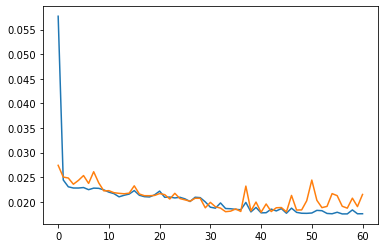

In [14]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [15]:
predict = model.predict(X_test)

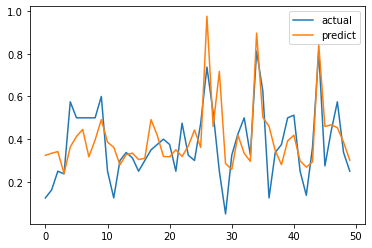

In [16]:
plt.plot(Y_test[-50:], label='actual')
plt.plot(predict[-50:], label='predict')
plt.legend()
plt.show()